In [250]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### what was the best month for sales?how much was earned that month?

#### MERGING 12 MONTHS OF SALES DATA INTO SINGLE FILE

In [218]:
df = pd.read_csv("./Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [219]:
files=[]
for file in os.listdir("./Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"):
    if (file.endswith('.csv')):
        files.append(file)
#files=[file for file in od.listdir(path) ]

In [220]:
files

['all_data.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [221]:
df=pd.DataFrame()
for file in files:
    data=pd.read_csv("./Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    df=pd.concat([df,data])

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373700 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 20.0+ MB


In [223]:
df.to_csv("./Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv",index=False)

In [267]:
df=pd.read_csv("./Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv")

In [268]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"


#### clean up the data

#### drop the nan rows

In [273]:
#find out the nan rows
nan_df=df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
372026,NaN,NaN,NaN,NaN,NaN,NaN
372288,NaN,NaN,NaN,NaN,NaN,NaN
372892,NaN,NaN,NaN,NaN,NaN,NaN
373398,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
df=df.dropna(how="all")

In [227]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### find 'or' and delete it

In [228]:
temp_df=df[df['Order Date'].str[0:2]=='Or']

In [229]:
df = df[df['Order Date'].str[0:2]!='Or']

In [230]:
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Augment data with additional columns

#### Add month column

In [231]:
type(df['Order Date'][2])

str

In [125]:
nulls =np.where(df.iloc[1].isnull())

In [126]:
nulls

(array([], dtype=int64),)

In [127]:
len(df)

185950

In [128]:
#df.drop(index=[1],inplace=True)#do operation inplace and return none
#df.reset_index(inplace=True)      

In [232]:
df["Month"] = df['Order Date'].str[0:2]

In [233]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [234]:
df['Month'] = df['Month'].astype('int32')

#### add sales column

#### convert to write forat

In [235]:
type(df['Month'].iloc[2])

numpy.int32

In [236]:
type(df["Quantity Ordered"].iloc[2])

str

In [237]:
type(df['Price Each'].iloc[2])

str

#### adding sales column

In [238]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')

In [239]:
df['Price Each']=df['Price Each'].astype('float')

In [240]:
#df[column]=pd.to_numeric(df[column])

In [241]:
df['Sales'] =df["Quantity Ordered"]*df['Price Each']

In [242]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [260]:
df['city'] = df['Purchase Address'].apply(lambda x:x.split(',')[1])

In [244]:
df['State'] = df['Purchase Address'].apply(lambda x:x.split(',')[2].split(' ')[1])

In [245]:
df['location'] = df['City']+", "+df['State']

In [259]:
df.drop(columns=['State','City'],inplace=True)

In [145]:
results= df.groupby('Month').sum()

In [146]:
max(df.groupby('Month').sum()['Sales'])

4613443.340001534

Text(0.5, 0, 'Months')

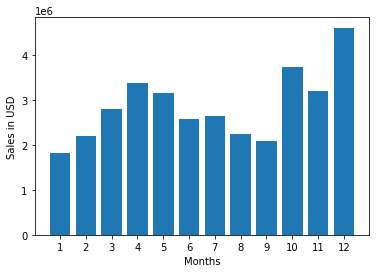

In [161]:
months=range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')

#### what US city has the highest number of sales

In [148]:
result_city = df.groupby('location').sum()

In [175]:
cities=[city for city,df1 in df.groupby('location')]

Text(0, 0.5, 'Sales')

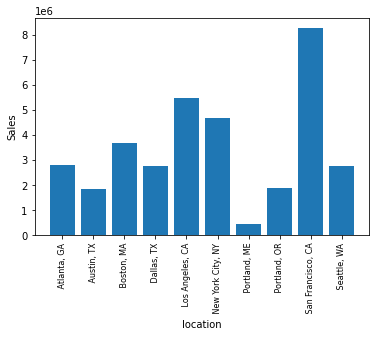

In [176]:
plt.bar(cities,result_city['Sales'])
plt.xticks(cities,size=8,rotation='vertical')
plt.xlabel('location')
plt.ylabel('Sales')


#### what time should we display advertisements to maxmize the liklihood of customers buying product

In [177]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,location
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [178]:
#convert order date into date time object
df['Order Date'] =pd.to_datetime(df['Order Date'])

In [179]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,location
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"


In [182]:
df['hour']=df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute

In [183]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,location,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38


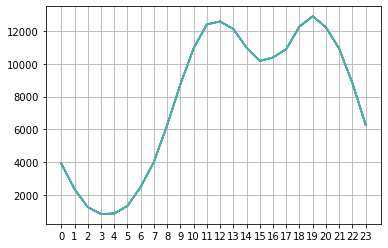

In [194]:
hours=[hour for hour,df1 in df.groupby('hour')]
plt.plot(hours,df.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()

In [192]:
df.groupby('location').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,hour,minute
location,,,,,,,,,,
"Atlanta, GA",14881,14881,14881,14881,14881,14881,14881,14881,14881,14881
"Austin, TX",9905,9905,9905,9905,9905,9905,9905,9905,9905,9905
"Boston, MA",19934,19934,19934,19934,19934,19934,19934,19934,19934,19934
"Dallas, TX",14820,14820,14820,14820,14820,14820,14820,14820,14820,14820
"Los Angeles, CA",29605,29605,29605,29605,29605,29605,29605,29605,29605,29605
"New York City, NY",24876,24876,24876,24876,24876,24876,24876,24876,24876,24876
"Portland, ME",2455,2455,2455,2455,2455,2455,2455,2455,2455,2455
"Portland, OR",10010,10010,10010,10010,10010,10010,10010,10010,10010,10010
"San Francisco, CA",44732,44732,44732,44732,44732,44732,44732,44732,44732,44732


#### what products are often sold together

In [254]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [255]:
df['State'] = df['Purchase Address'].apply(lambda x:x.split(',')[2].split(' ')[1])

In [256]:
dups = df[df['Order ID'].duplicated(keep=False)]
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

In [257]:
#dropping duplicates
df_gouped=df[['Order ID','grouped']].drop_duplicates()

In [258]:
count=Counter()
for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3))) #try with 2,1

#print (count.most_common())
for key,value in count.most_common():
    print (key,value)

('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 4370
('Lightning Charging Cable', 'iPhone', 'Lightning Charging Cable') 4358
('iPhone', 'Lightning Charging Cable', 'iPhone') 4346
('USB-C Charging Cable', 'Google Phone', 'USB-C Charging Cable') 4308
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 4302
('iPhone', 'iPhone', 'Lightning Charging Cable') 4292
('Google Phone', 'USB-C Charging Cable', 'Google Phone') 4280
('Google Phone', 'Google Phone', 'USB-C Charging Cable') 4232
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2182
('iPhone', 'Wired Headphones', 'iPhone') 2040
('Wired Headphones', 'iPhone', 'Wired Headphones') 2040
('iPhone', 'Wired Headphones', 'Wired Headphones') 1974
('iPhone', 'iPhone', 'Wired Headphones') 1974
('Wired Headphones', 'Google Phone', 'Wired Headphones') 1956
('Google Phone', 'Wired Headphones', 'Google Phone') 1940
('Google Phone', 'Wired Headphones', 'Wired Headphones') 1938
('Google Phone', 'Google Phone',